In [1]:
import pandas as pd
import numpy as np

# Loading the dataset
ufo = pd.read_csv('/home/jake_ockerby/Python/ufo_sightings/ufo.csv')
ufo.columns = ['datetime','city','state','country','shape','duration(secs)','duration(hrs/mins)','comments','date posted','latitude','longitude']
ufo

/home/jake_ockerby/.local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,datetime,city,state,country,shape,duration(secs),duration(hrs/mins),comments,date posted,latitude,longitude
0,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
1,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
2,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
3,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
4,10/10/1961 19:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,4/27/2007,36.5950000,-82.188889
5,10/10/1965 21:00,penarth (uk/wales),NaN,gb,circle,180,about 3 mins,penarth uk circle 3mins stayed 30ft above m...,2/14/2006,51.434722,-3.180000
6,10/10/1965 23:45,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,10/2/1999,41.1175000,-73.408333
7,10/10/1966 20:00,pell city,al,us,disk,180,3 minutes,Strobe Lighted disk shape object observed clos...,3/19/2009,33.5861111,-86.286111
8,10/10/1966 21:00,live oak,fl,us,disk,120,several minutes,Saucer zaps energy from powerline as my pregna...,5/11/2005,30.2947222,-82.984167
9,10/10/1968 13:00,hawthorne,ca,us,circle,300,5 min.,ROUND &#44 ORANGE &#44 WITH WHAT I WOULD SAY W...,10/31/2003,33.9163889,-118.351667


In [2]:
# Showing the null values and filling them in
print(ufo.isnull().sum())

datetime                 0
city                     0
state                 5797
country               9670
shape                 1932
duration(secs)           0
duration(hrs/mins)       0
comments                15
date posted              0
latitude                 0
longitude                0
dtype: int64


In [3]:
ufo = ufo.fillna('?')
print(ufo.isnull().sum())

datetime              0
city                  0
state                 0
country               0
shape                 0
duration(secs)        0
duration(hrs/mins)    0
comments              0
date posted           0
latitude              0
longitude             0
dtype: int64


In [4]:
# Loading 10 most busiest airports location data
data = {'airport': ['Hartsfield–Jackson Atlanta International Airport',
'Los Angeles International Airport',
"O'Hare International Airport",
'Dallas/Fort Worth International Airport',
'Denver International Airport',
'John F. Kennedy International Airport',
'San Francisco International Airport',
'Seattle–Tacoma International Airport',
'McCarran International Airport',
'Orlando International Airport'], 'latitude': ['33.640411',
'33.942791',
'41.978611',
'32.89748',
'39.849312',
'40.6413',
'37.615223',
'47.443546',
'36.08601',
'28.4312'], 'longitude': ['-84.419853',
'-118.410042',
'-87.904724',
'-97.040443',
'-104.673828',
'-73.7781',
'-122.389977',
'-122.301659',
'-115.153969',
'-81.3081']}

airports = pd.DataFrame(data=data)
airports

,airport,latitude,longitude
0,Hartsfield–Jackson Atlanta International Airport,33.640411,-84.419853
1,Los Angeles International Airport,33.942791,-118.410042
2,O'Hare International Airport,41.978611,-87.904724
3,Dallas/Fort Worth International Airport,32.89748,-97.040443
4,Denver International Airport,39.849312,-104.673828
5,John F. Kennedy International Airport,40.6413,-73.7781
6,San Francisco International Airport,37.615223,-122.389977
7,Seattle–Tacoma International Airport,47.443546,-122.301659
8,McCarran International Airport,36.08601,-115.153969
9,Orlando International Airport,28.4312,-81.3081


In [5]:
import folium 
from folium import Marker
from folium.plugins import MarkerCluster

# Creating a function to visualise maps from a source of your choice
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='500px')

In [6]:
import math

us_map = folium.Map(location=[40,-99], zoom_start=4)
mc = MarkerCluster()

# Adding the airport markers to the map
for idx, row in airports.iterrows():
    Marker([row['latitude'], row['longitude']]).add_to(us_map)

# Adding marker clusters of US UFO sightings
for idx, row in ufo[ufo['country'] == 'us'].iterrows():
        mc.add_child(folium.Marker([row['latitude'], row['longitude']]))
        
us_map.add_child(mc)
embed_map(us_map, 'www.openstreetmap.html')
# As shown in the map, the largest clusters of UFO sightings are very closeby to all major airports
# suggesting that air traffic may be mistaken with UFOs
# However all major airports are within highly populated cities of the US, so we would expect
# a higher number of sightings in those areas anyway

In [7]:
# Using functions to split datetimes into separate parts for further analysis
def year(x):
    x = x.split('/')
    x = x[2].split(' ')[0]
    return x

def month(x):
    x = x.split('/')[0]
    return x

def time(x):
    x = x.split('/')
    x = x[2].split(' ')[1]
    x = x.split(':')[0]
    return x

ufo['year sighted'] = ufo['datetime'].apply(year)
ufo['month sighted'] = ufo['datetime'].apply(month)
ufo['time sighted'] = ufo['datetime'].apply(time)

In [8]:
# Obtaining the frequency of sightings for each year, month and time of day
year_data = ufo['year sighted'].value_counts()
month_data = ufo['month sighted'].value_counts()
time_data = ufo['time sighted'].value_counts()

Text(0, 0.5, 'Frequency')

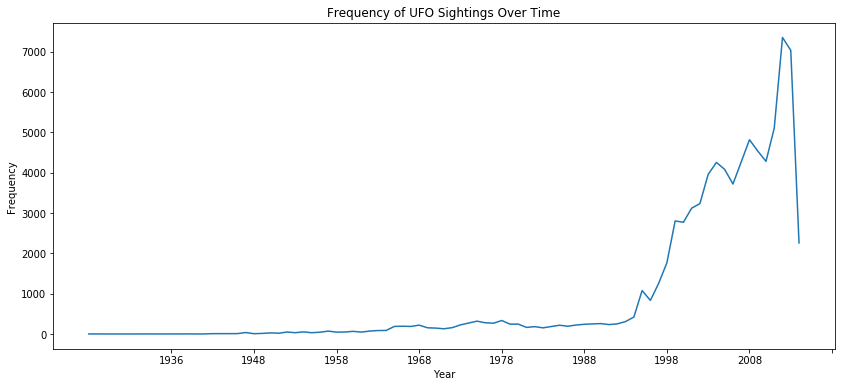

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,6))
plt.title('Frequency of UFO Sightings Over Time')
sns.lineplot(data=year_data)
plt.xticks(np.arange(10, 100, step=10))
plt.xlabel('Year')
plt.ylabel('Frequency')

# The graph shows a steady rise of sightings since the 1950's, increasing rapidly since the 1990's
# and peaking at around 2012
# This could be due to the increased air travel since the latter half of the 20th century and a 
# cultural shift towards extraterrestrials and space exploration

In [11]:
months = ['','January','February','March','April','May','June','July','August','September','October','November','December']

# Putting the value counts data into a dataframe and ordering the index from 1 to 12
month_data = pd.DataFrame(data=month_data)
month_data = month_data.reindex(['1','2','3','4','5','6','7','8','9','10','11','12'])

# Added a blank string to the list because the loop skipped over January
# Renamed month values with month names in the list
for i in range(13):
    month_data = month_data.rename(index={str(i) : months[i]})
    
month_data

,month sighted
January,5689
February,4665
March,5450
April,5527
May,5293
June,8152
July,9520
August,8636
September,7589
October,7406


Text(0, 0.5, 'Frequency')

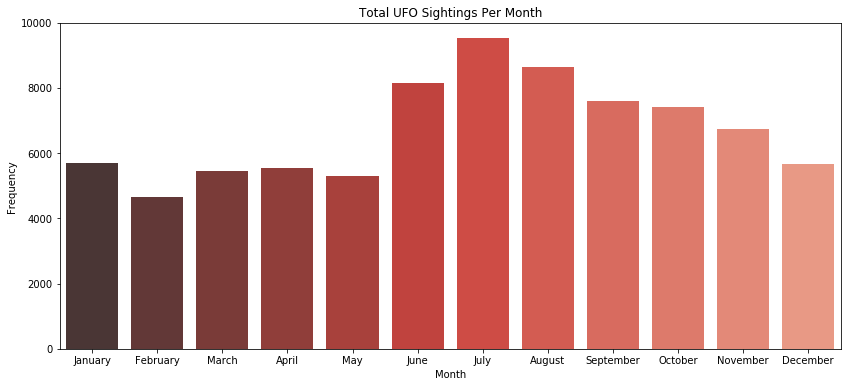

In [12]:
plt.figure(figsize=(14,6))
plt.title('Total UFO Sightings Per Month')
sns.barplot(x=month_data.index, y=month_data['month sighted'], palette='Reds_d')
plt.xlabel('Month')
plt.ylabel('Frequency')

# The graph shows the highest number of UFO sightings occurred in the month of July

Text(0, 0.5, 'Frequency')

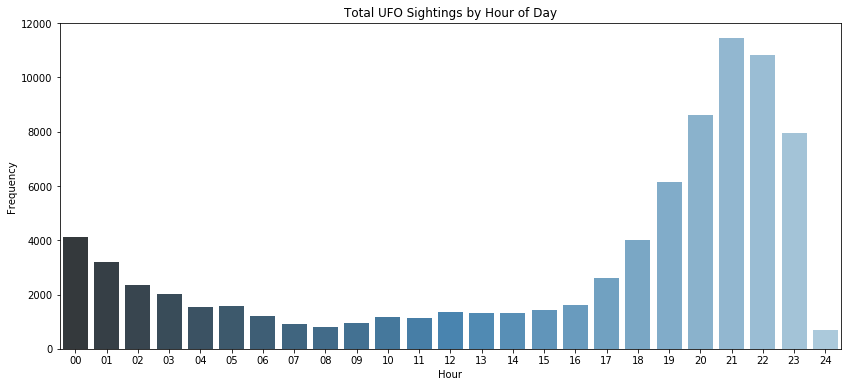

In [13]:
time_data = pd.DataFrame(data=time_data)
plt.figure(figsize=(14,6))
plt.title('Total UFO Sightings by Hour of Day')
sns.barplot(x=time_data.index, y=time_data['time sighted'], palette='Blues_d')
plt.xlabel('Hour')
plt.ylabel('Frequency')

# The graph shows the highest number of UFO sightings occured within the hour of 21:00

Text(0, 0.5, 'Frequency')

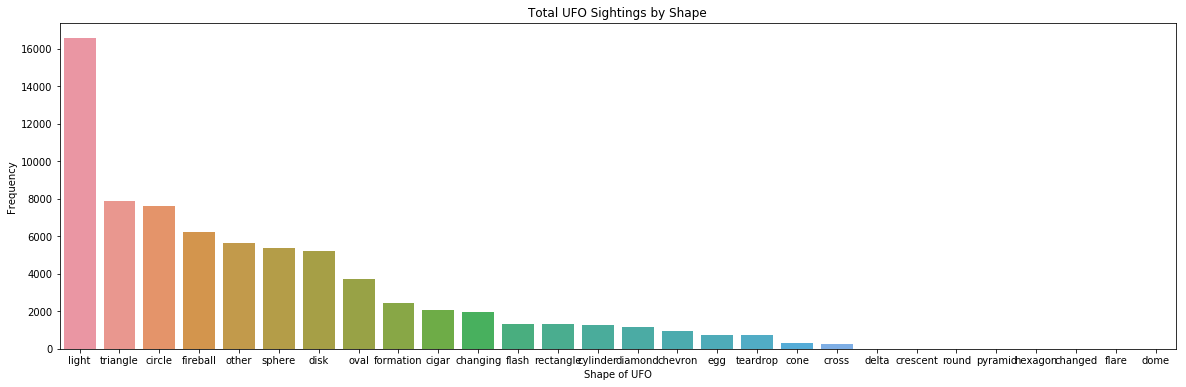

In [14]:
# Creating a frequency table for the shape data and dropping the unknown values
shape_data = ufo['shape'].value_counts()
shape_data = pd.DataFrame(data=shape_data)
shape_data = shape_data.drop(['?','unknown'])

plt.figure(figsize=(20,6))
plt.title('Total UFO Sightings by Shape')
sns.barplot(x=shape_data.index, y=shape_data['shape'])
plt.xlabel('Shape of UFO')
plt.ylabel('Frequency')

In [15]:
# From these findings, the most likely UFO encounter happens at 9pm on a day in July, comes in the form
# of a light and occurs in either the California or New York area

# These findings could be explained by reduced visibility at night, the proximity to airports, alien culture,
# and unusual natural phenomena such as ball lightning